# Hypothesis-Test

* **Normailty**   ---  Target variable should be normally distributed
.


* **Correlation** --    continous/continous  or  Categorical/Categorical 
.


* **Ohers** --   Parametric - t-test    /    non-parametric  chi_2 Test   / Stationary test -- In time series Analysis 

## Normality Test:

A normality test is a statistical procedure used to determine whether a dataset follows a normal distribution (Gaussian distribution). The normal distribution is characterized by its bell-shaped curve and specific properties, such as symmetry and a well-defined mean and standard deviation. Normality tests are essential because many statistical techniques assume that the data being analyzed is normally distributed. If the data significantly deviates from normality, it can affect the validity of certain statistical analyses.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Normality Test using Shapiro-Wilk Test  
##### Tests if the dataset is Normally distributed or no
The Shapiro-Wilk test is a popular normality test used to assess whether a dataset follows a normal distribution. It is based on the idea that if the data is normally distributed, the deviations of individual data points from the mean should follow a specific pattern.

In the Shapiro-Wilk test:

The null hypothesis (H0) assumes that the data follows a normal distribution.
The alternative hypothesis (H1) is that the data does not follow a normal distribution.
The test statistic, denoted as W, is calculated based on the sample data. If the p-value associated with the test is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis, indicating that the data significantly deviates from a normal distribution.

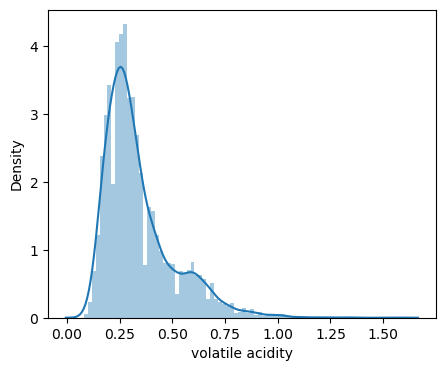

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.distplot(a=data['volatile acidity'], bins = 80)
plt.show()

In [5]:
from scipy.stats import shapiro

In [50]:
null_hypothesis  = 'Normally distributed'
alternative_hypothesis = 'Not Normally distributed'

In [55]:
# Extract the 'volatile acidity' column from your DataFrame
data_to_test = data['volatile acidity']

# Check for missing values
if data_to_test.isna().any():
    print("Warning: Missing values found in the 'volatile acidity' column. Handle missing data before testing.")
else:
    # Perform the Shapiro-Wilk test
    stat, p = shapiro(data_to_test)
    print(f"stat = {stat:.2f}, p = {p:.3f}")

    if p < 0.05:
        print("Reject the null hypothesis: Data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis: Data may be normally distributed.")


In [42]:
data_to_test = data['volatile acidity'].dropna()
stat, p = shapiro(data_to_test)
print(f"stat = {stat:.2f}, p = {p:.10f}")

if p < 0.05:
    print("Reject the null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Data may be normally distributed.")


stat = 0.88, p = 0.0000000000
Reject the null hypothesis: Data is not normally distributed.


# lets test with K^2 test for normality test

The K2 test, also known as the Lilliefors test, is a variation of the Kolmogorov-Smirnov test designed specifically for testing normality. While the original Kolmogorov-Smirnov test can be used for testing any distribution against a known distribution, the K2 test focuses on testing whether a dataset follows a normal distribution.

Like the Shapiro-Wilk test, the K2 test is based on comparing the empirical distribution function of the data to the expected cumulative distribution function of a normal distribution. It assesses the deviation of the dataset from normality.

The K2 test is particularly useful when you want to test for normality against a specific distribution (i.e., the normal distribution) and is often used as an alternative to the Shapiro-Wilk test.

In [52]:
from scipy.stats import normaltest

In [53]:
test_data = data['alcohol']

In [56]:
if test_data.isna().any():
    print("warning : Handle missing values")
else:
    stat,p = normaltest(test_data)
    print(f"stat = {stat:.3f}, p ={p:.6f}")
    
    if p < 0.05:
        print('Reject the null hypothesis: Data is not normally distributed')
    else:
        print("Fail to Reject Null hypothesis : Data is Normally Distributed")

stat = 449.961, p =0.000000
Reject the null hypothesis: Data is not normally distributed


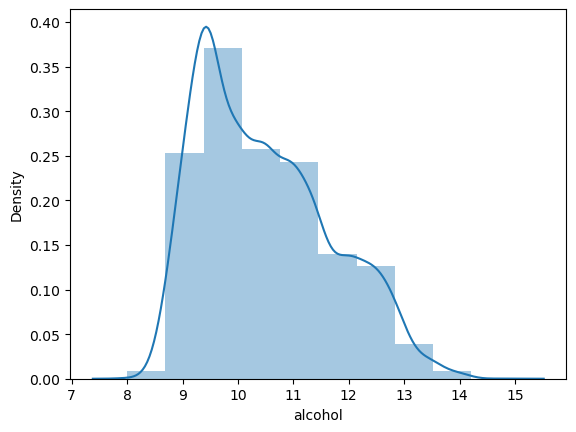

In [60]:
sns.distplot(a=data['alcohol'], bins=10)
plt.show()


**Shapiro-Wilk Test:**

- Imagine you have a group of students, and you want to know if their test scores are normally distributed, meaning the scores follow a specific pattern like a bell-shaped curve.
- The Shapiro-Wilk test checks how well the scores match this bell-shaped pattern.
- If the test says the scores are not close to this pattern (p-value is small), you might conclude that they don't follow a normal distribution.
- Example: If most students' scores are clustered around the average with only a few very high or very low scores, it's close to normal, and the test might say "yes."

**K2 (Lilliefors) Test:**

- Now, let's say you're not just interested in a general bell-shaped pattern; you specifically want to check if the scores match exactly with a normal distribution.
- The K2 test does a similar job but focuses on checking against this very precise bell-shaped pattern.
- It can be useful if you want to be very sure that the scores follow a perfect bell curve.
- Example: If you compare the scores to a perfectly shaped bell curve and they don't match perfectly (p-value is small), the test might say "no."

In summary, both tests check if data looks like a bell-shaped curve, but the Shapiro-Wilk test is more common and flexible, while the K2 test is more specific and less sensitive to sample size. Which one to use depends on how exact you want your bell-shaped pattern to be.